# 1. 

n_0: 3.1255926338293483 n_1:  0.1540181798438225


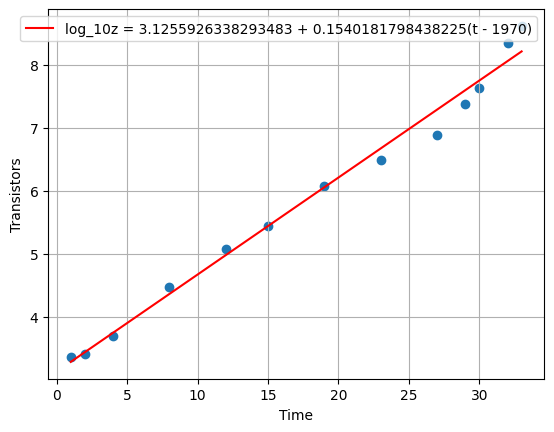

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd 

data = pd.read_csv('YearTransistor.csv')
data['Transistors'] = data['Transistors'].str.replace(',', '').astype(float)
t = data['Year'].values
z = data['Transistors'].values

t = t - 1970
z = np.log10(z)

plt.scatter(t,z)
plt.grid(1)
plt.xlabel('Time')
plt.ylabel('Transistors')

model = LinearRegression() 
model.fit(t.reshape(-1,1),z.reshape(-1,1))
print('n_0:', model.intercept_[0], 'n_1: ', model.coef_[0][0]) 
plt.plot(t.reshape(-1,1), model.predict(t.reshape(-1,1)), 'r', label = f'log_{10}z = {model.intercept_[0]} + {model.coef_[0][0]}(t - 1970)') # how to draw the learned line
plt.legend()

# 2. 

iter    0  cost=0.0408
iter  500  cost=0.0352
iter 1000  cost=0.0342
iter 1500  cost=0.0337
iter 2000  cost=0.0334
iter 2500  cost=0.0332
iter 3000  cost=0.0330
iter 3500  cost=0.0330
iter 4000  cost=0.0329
iter 4500  cost=0.0329

Final w = [ 0.01420549  0.23226869 -0.30214432]


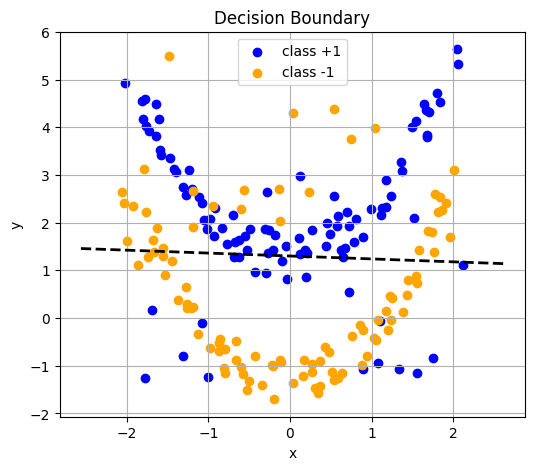


Precision: 0.7079646017699115
Recall:    0.8
Accuracy:  0.735


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

data = pd.read_csv('data.csv')

X = data[['x', 'y']].values         # shape (P,2)
y = data['label'].values.astype(float)   # -1 or +1

X_bar = np.c_[X, np.ones(X.shape[0])]

b = 0.04   # chosen b

def cost(w, X, y, b):
    e = X @ w - y
    return np.mean(-1.0 + np.exp(b * e**2))

def grad(w, X, y, b):
    P = X.shape[0]
    e = X @ w - y
    factor = np.exp(b * e**2) * e    
    g = (2*b / P) * (X.T @ factor)
    return g


np.random.seed(0)
w = np.zeros(X_bar.shape[1])   # w = [0,0,0]
lr = 0.01
iters = 5000

for i in range(iters):
    g = grad(w, X_bar, y, b)
    w -= lr * g
    if i % 500 == 0:
        print(f"iter {i:4d}  cost={cost(w, X_bar, y, b):.4f}")

print("\nFinal w =", w)

plt.figure(figsize=(6,5))

pos = y == 1
neg = y == -1
plt.scatter(X[pos,0], X[pos,1], c='b', label='class +1')
plt.scatter(X[neg,0], X[neg,1], c='orange', label='class -1')

xs = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200)

if abs(w[1]) > 1e-6:
    ys = -(w[0]*xs + w[2]) / w[1]
    plt.plot(xs, ys, 'k--', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

def predict(X, w):
    return np.where(X @ w >= 0, 1, -1)

y_pred = predict(X_bar, w)

precision = precision_score(y, y_pred, pos_label=1) # precision = TP/(TP+FP)
recall    = recall_score(y, y_pred, pos_label=1) # recall = TP/(TP+FN)
accuracy  = accuracy_score(y, y_pred) # accuracy = (TP+TN) / ALL

print("\nPrecision:", precision)
print("Recall:   ", recall)
print("Accuracy: ", accuracy)
